In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Importing and Cleaning:

data = pd.read_excel("new_york_2013.xls", index_col = "Table 8", skiprows = [1, 2, 3, 4], skipfooter = 3)

data = data.rename(columns = {'Unnamed: 1': 'Population', 'Unnamed: 2': 'Violent_Crime', 'Unnamed: 3': 'Murder',
                       'Unnamed: 4': 'Rape_1', 'Unnamed: 5': 'Rape_2', 'Unnamed: 6': 'Robbery',
                       'Unnamed: 7': 'Agg_Assault', 'Unnamed: 8': 'Prop_Crime', 'Unnamed: 9': 'Burglary',
                       'Unnamed: 10': 'Larceny_Theft', 'Unnamed: 11': 'Vehicle_Theft', 'Unnamed: 12': 'Arson'})


In [54]:
# Feature Engineering: (Also had to manipulate data_2 a bit because of a 'copy error')

data_2 = pd.DataFrame(data[['Population', 'Murder', 'Robbery', 'Prop_Crime']])


data_2['Cat_Murder'] = data_2.Murder > 0
data_2['Cat_Robbery'] = data_2.Robbery > 0
data_2['Population*2'] = data_2.Population**2

data_A = pd.DataFrame(data_2.loc[data_2['Population'] < 100000])
data_nyc = pd.DataFrame(data_2.loc[data_2['Population'] > 1000000])
data_metros = pd.DataFrame(data_2.loc[data_2['Population'] > 100000])

categoricals_A = data_A[['Cat_Murder', 'Cat_Robbery']]
categoricals_nyc = data_nyc[['Cat_Murder', 'Cat_Robbery']]

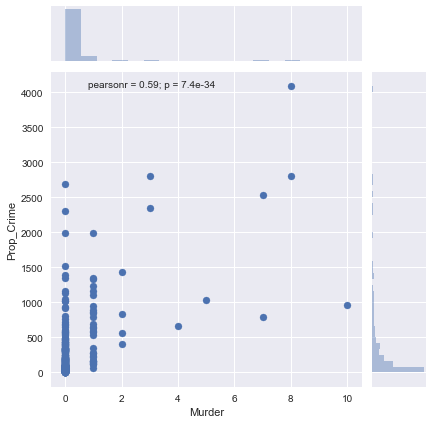

In [55]:
# Lookin' around for outliers - Took NYC out of the picture here to get an idea of the rest of the population 
# without it being skewed by such a large city.  This shows the number of property crimes in relation to the number
# of murders.

# data_A.describe()
# data_A.shape

sns.jointplot(x = 'Murder', y = 'Prop_Crime', data = data_A)
plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


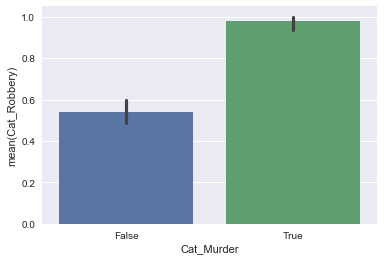

In [56]:
# Looking at the categorical variables - Murder and Robbery - in relation to each other.

sns.barplot(x = 'Cat_Murder', y = 'Cat_Robbery', data = categoricals)
plt.show()

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


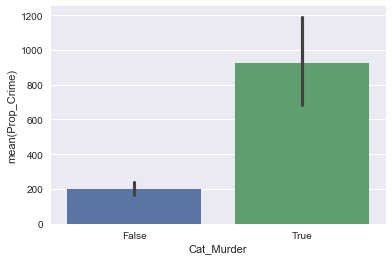

In [57]:
# Murder in relation to Property Crime
sns.barplot(x = 'Cat_Murder', y = 'Prop_Crime', data = data_A)
plt.show()

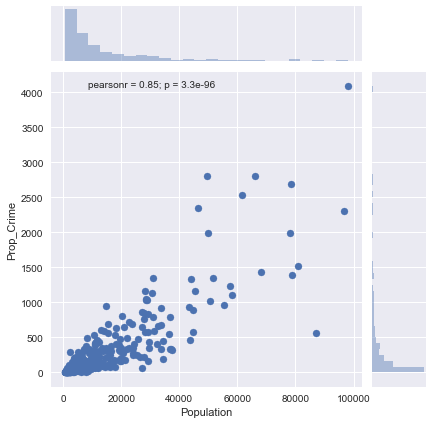

In [58]:
sns.jointplot(x = "Population", y = 'Prop_Crime', data = data_A)
plt.show()

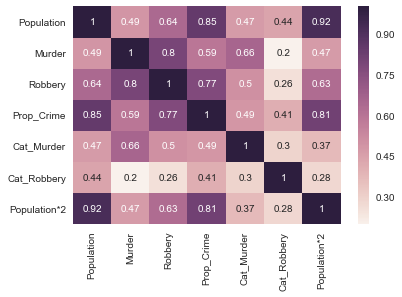

In [59]:
# Looking at the correlation matrix:

sns.heatmap(data_A.corr(), annot = True)
plt.show()

In [63]:
data_A['Murder/Capita'] = (data_A.Murder / data_A.Population)*10000
data_nyc['Murder/Capita'] = (data_nyc.Murder / data_nyc.Population)*10000
data_metros['Murder/Capita'] = (data_metros.Murder / data_metros.Population)*10000

In [70]:
# This is interesting:
data_A['Murder/Capita'].mean()
data_nyc['Murder/Capita'].mean()
data_metros['Murder/Capita'].mean()

1.0092769319379837

In [72]:
data_metros

,Population,Murder,Robbery,Prop_Crime,Cat_Murder,Cat_Robbery,Population*2,Murder/Capita
Table 8,,,,,,,,
Amherst Town,118296,1,31,2118,True,True,13993943616,0.084534
Buffalo,258789,47,1322,12491,True,True,66971746521,1.816151
New York,8396126,335,19170,141971,True,True,70494931807876,0.398994
Rochester,210562,42,918,10051,True,True,44336355844,1.994662
Syracuse,143834,21,400,6473,True,True,20688219556,1.460016
Yonkers,199134,6,390,2368,True,True,39654349956,0.301305


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


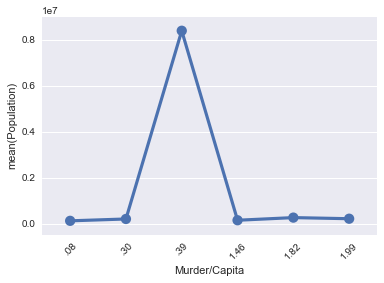

In [83]:
sns.pointplot(x = 'Murder/Capita', y = 'Population', data = data_metros).set_xticklabels(
    labels = ['.08', '.30', '.39', '1.46', '1.82', '1.99'], rotation = 45)
plt.show()